In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

In [9]:
# Load the CSV data into a DataFrame and examine the first few rows to understand the structure
data_path = 'buyer-final.csv'
data = pd.read_csv(data_path, delimiter=';', usecols=['event_type', 'price', 'dateandtime'])
data.head()

,event_type,price,dateandtime
0,buy,80,2018.01.05 10:23
1,buy,8,2018.01.04 0:50
2,buy,8,2018.01.10 2:09
3,buy,8,2018.02.24 18:22
4,buy,8,2018.01.22 8:09


In [10]:
# Convert 'dateandtime' to datetime and extract the date to a new column
data['date'] = pd.to_datetime(data['dateandtime']).dt.date

# Group by the new 'date' column and sum up the 'price' values to get daily revenues
daily_revenues = data.groupby('date')['price'].sum()

# Convert to a dictionary for daily revenues
daily_revenues_dict = daily_revenues.to_dict()
daily_revenues_dict

{datetime.date(2018, 1, 1): 200,
 datetime.date(2018, 1, 2): 304,
 datetime.date(2018, 1, 3): 304,
 datetime.date(2018, 1, 4): 312,
 datetime.date(2018, 1, 5): 480,
 datetime.date(2018, 1, 6): 368,
 datetime.date(2018, 1, 7): 352,
 datetime.date(2018, 1, 8): 640,
 datetime.date(2018, 1, 9): 432,
 datetime.date(2018, 1, 10): 752,
 datetime.date(2018, 1, 11): 768,
 datetime.date(2018, 1, 12): 296,
 datetime.date(2018, 1, 13): 688,
 datetime.date(2018, 1, 14): 704,
 datetime.date(2018, 1, 15): 784,
 datetime.date(2018, 1, 16): 624,
 datetime.date(2018, 1, 17): 1072,
 datetime.date(2018, 1, 18): 408,
 datetime.date(2018, 1, 19): 1952,
 datetime.date(2018, 1, 20): 1680,
 datetime.date(2018, 1, 21): 840,
 datetime.date(2018, 1, 22): 608,
 datetime.date(2018, 1, 23): 784,
 datetime.date(2018, 1, 24): 672,
 datetime.date(2018, 1, 25): 1320,
 datetime.date(2018, 1, 26): 464,
 datetime.date(2018, 1, 27): 712,
 datetime.date(2018, 1, 28): 904,
 datetime.date(2018, 1, 29): 2072,
 datetime.date(201

In [11]:
# Create a DataFrame for linear regression
df_revenues = pd.DataFrame(list(daily_revenues_dict.items()), columns=['Date', 'Revenue'])

# Convert 'Date' to datetime
df_revenues['Date'] = pd.to_datetime(df_revenues['Date'])

# Assign a 'DayNumber' relative to the first date in the DataFrame
df_revenues['DayNumber'] = (df_revenues['Date'] - df_revenues['Date'].min()).dt.days

# Prepare the data for the regression model
X = df_revenues[['DayNumber']]  # Features
y = df_revenues['Revenue']      # Target variable

# Create a linear regression model
model = LinearRegression()

# Fit the model
model.fit(X, y)

# The model's intercept and slope (coefficient)
intercept = model.intercept_
slope = model.coef_[0]

# Calculate the R-squared value
r_squared = model.score(X, y)

intercept, slope, r_squared

(78.08838951310963, 47.88818522301666, 0.5783472575365921)

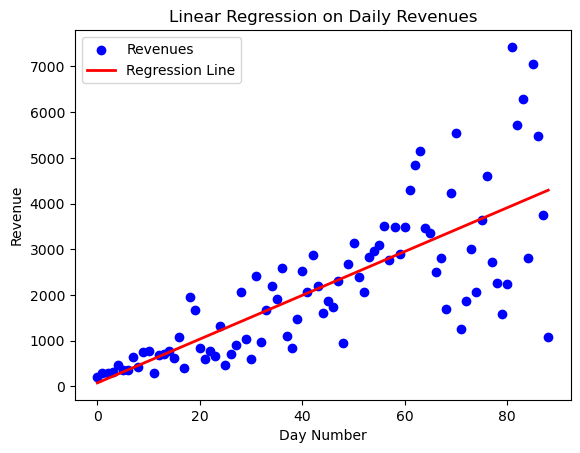

In [13]:
# Predict revenues using the model to plot the regression line
y_pred = model.predict(X)

# Plot the original data points
plt.scatter(X, y, color='blue', label='Revenues')

# Plot the regression line
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')

# Label the plot
plt.title('Linear Regression on Daily Revenues')
plt.xlabel('Day Number')
plt.ylabel('Revenue')
plt.legend()

# Show the plot
plt.show()